In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
age_mature=57

n_age_bins = 150
nyears = 1000

ages = np.arange(n_age_bins)
time = np.arange(nyears)


In [3]:
### first try to model a set of constant rates, and make sure that I can invert to get back the constant rates

def get_agearray():
    age_dist = xr.DataArray(np.zeros((nyears, n_age_bins)), coords=[time,ages], dims=['time','age'])
    age_dist[0,0] = 1.
    return age_dist

In [4]:
def piecewise_exponential(k1, k2, m):
    ### this function calculates a piecewise exponential function, whose integral equals one
    
    # calculate the frequency of youngest age bin
    a = 1./((1./k1)+np.exp(-k1*m)*((-1/k1)+(1/k2)))
    
    # calculate the first piecewise exponential set
    vals = a * np.exp(-k1*ages)
    
    # calculate the second piecewise exponential set, beginning with the last element ofthe first set
    vals[m:] = vals[m]*np.exp(-k2*np.arange(n_age_bins-m))
    
    # rescale last age bin to account for all of the truncated ages beyond
    vals[-1] = vals[-1]/k2
    return(vals)

get_agearray().plot(x='time',y='age')

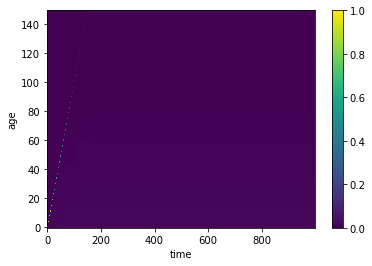

In [5]:
young_harvest_rate = 0.015
mature_harvest_rate = 0.03

age_dist = get_agearray()
for t in range(nyears-1):
    for age in range(age_mature):
        age_dist[t+1,age+1] = age_dist[t,age] * (1.-young_harvest_rate)
        age_dist[t+1,0] = age_dist[t+1,0] + age_dist[t,age] * (young_harvest_rate)
    for age in range(age_mature,n_age_bins-2):
        age_dist[t+1,age+1] = age_dist[t,age] * (1.-mature_harvest_rate)
        age_dist[t+1,0] = age_dist[t+1,0] + age_dist[t,age] * (mature_harvest_rate)
    age_dist[t+1,n_age_bins-1] = (age_dist[t,n_age_bins-1] + age_dist[t,n_age_bins-2]) * (1.-mature_harvest_rate)
    age_dist[t+1,0] = age_dist[t+1,0] + (age_dist[t,n_age_bins-1] + age_dist[t,n_age_bins-2]) * (mature_harvest_rate)


age_dist.plot(x='time',y='age')

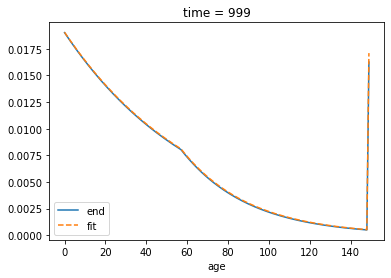

In [6]:
age_dist.isel(time=-1).plot(label='end')
plt.plot(ages, piecewise_exponential(young_harvest_rate, mature_harvest_rate, age_mature), linestyle='dashed', label='fit')
plt.legend()

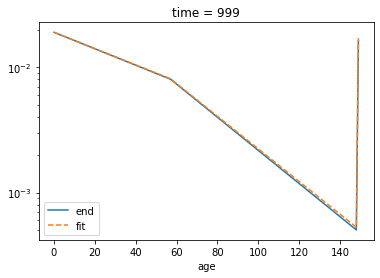

In [7]:
age_dist.isel(time=-1).plot(label='end')
plt.plot(ages, piecewise_exponential(young_harvest_rate, mature_harvest_rate, age_mature), linestyle='dashed', label='fit')
plt.yscale("log")
plt.legend()

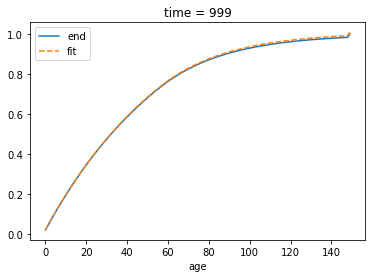

In [9]:
age_dist.isel(time=-1).cumsum().plot(label='end')
plt.plot(ages, piecewise_exponential(young_harvest_rate, mature_harvest_rate, age_mature).cumsum(), linestyle='dashed', label='fit')
plt.legend()

In [8]:
piecewise_exponential(young_harvest_rate, mature_harvest_rate, age_mature).sum()

1.0093017835715563

Latex equation for the age distribution of secondary lands

$ s\left(a\right)=\left\{
  \begin{array}{@{}ll@{}}
    s_0 exp\left(-a h_y \right), & \text{if}\ a\le a_m \\
    s_0 exp\left(-a_m h_y \right) exp \bigl(-\left(a-a_m\right) h_m \bigr), & \text{otherwise}\
  \end{array}\right. $

Where $s_0$ equals:

$ s_0 = \dfrac{1}{\dfrac{1}{h_y} + exp\bigl(-k_1 m\bigr)\bigl(\dfrac{-1}{h_y}+\dfrac{1}{h_m}\bigr)}$